# Root Insurance Project

### Erdos Institute 2021

Overview: In this problem, ACME Insurance Company wants to optimize its
marketing spend in the Vertical Search channel. In this channel,
customers enter information about their insurance needs, and insurers bid
in a first-price auction to have their ad shown to the customer. The
placement of the ad is determined by the insurer’s bid, with the highest bid
showing in the first ad position and the lowest bid shown in the lowest
position (in the data for this problem, 5th). The marketing channel
manager for Vertical Search wants to understand how to improve the
efficiency of the channel by bidding differently.

Google Drive Link: https://drive.google.com/drive/u/0/folders/1Wp6EkL-VbrWK9JP4SbcXjh-wb31vPg4V

In [1]:
# Import packages
## For data handling
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns

## White Background for plot style
sns.set_style("whitegrid")


In [2]:
## Read Data
df = pd.read_csv("../data/Root_insurance_data.csv")
print("Shape of Data Frame:", df.shape)
df.head()

Shape of Data Frame: (10000, 8)


,Currently Insured,Number of Vehicles,Number of Drivers,Marital Status,bid,rank,click,policies_sold
0,unknown,2,1,M,10.0,2,False,0
1,Y,3,1,M,10.0,5,False,0
2,Y,3,2,M,10.0,5,False,0
3,N,3,2,S,10.0,4,False,0
4,unknown,2,2,S,10.0,2,False,0


In [3]:
from collections import Counter

# It seems there are a lot more policies not sold than sold (unbalanced dataset)
Counter(df.policies_sold)

Counter({0: 9217, 1: 783})

### Plotting the Data


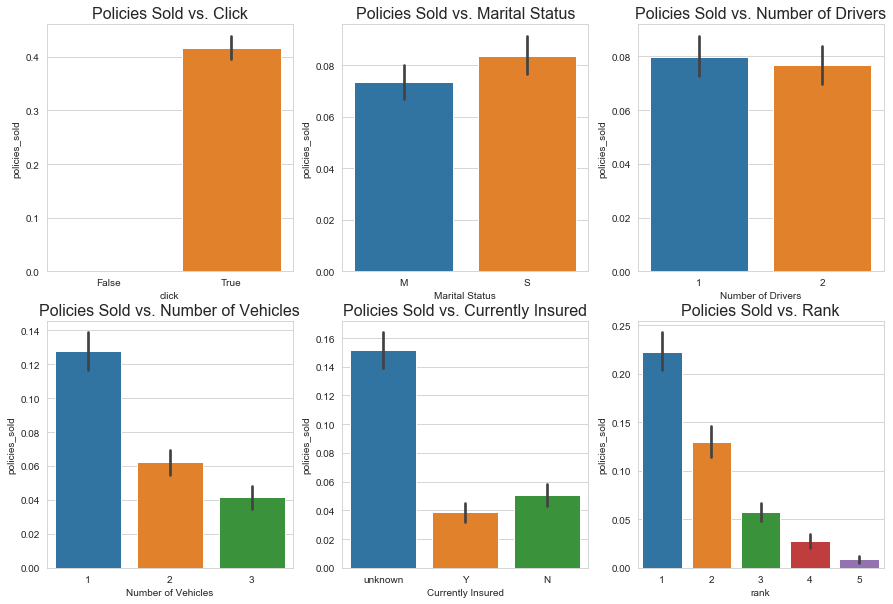

In [6]:
# Creating barplots

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

## Policies sold vs. Click
## Are those who click more likely to buy a policy?
sns.barplot(x="click", y="policies_sold", data=df, ax=axes[0][0])
axes[0][0].set_title("Policies Sold vs. Click", fontsize=16)

## Click vs. Marital Status
## Are those who are single more likely to click?
sns.barplot(x="Marital Status", y="policies_sold", data=df, ax=axes[0][1])
axes[0][1].set_title("Policies Sold vs. Marital Status", fontsize=16)

## Click vs. Number of Drivers
sns.barplot(x="Number of Drivers", y="policies_sold", data=df, ax=axes[0][2])
axes[0][2].set_title("Policies Sold vs. Number of Drivers", fontsize=16)

## Click vs. Number of Vehicles
sns.barplot(x="Number of Vehicles", y="policies_sold", data=df, ax=axes[1][0])
axes[1][0].set_title("Policies Sold vs. Number of Vehicles", fontsize=16)

## Click vs. Currently Insured
sns.barplot(x="Currently Insured", y="policies_sold", data=df, ax=axes[1][1])
axes[1][1].set_title("Policies Sold vs. Currently Insured", fontsize=16)

## Click vs. Rank
sns.barplot(x="rank", y="policies_sold", data=df, ax=axes[1][2])
axes[1][2].set_title("Policies Sold vs. Rank", fontsize=16)


### Classification - Logistic Regression

We want to create a model that can predict whether someone is likely to buy a policy or not.
Based on that model, the bidding will change (i.e., bid more for those more likely to buy a policy)

In [5]:
# Logistic Regression Model

## import the logistic regression method
from sklearn.linear_model import LogisticRegression
## import package to perform stratified test-train split
from sklearn.model_selection import train_test_split



In [6]:
# Creating dummy variables for the categorical data
# Note: ONLY RUN ONCE

df[['No_insur','Yes_insur']] = pd.get_dummies(df['Currently Insured'])[['N','Y']] 
df['Married'] = pd.get_dummies(df['Marital Status'])['M']

df

,Currently Insured,Number of Vehicles,Number of Drivers,Marital Status,bid,rank,click,policies_sold,No_insur,Yes_insur,Married
0,unknown,2,1,M,10.0,2,False,0,0,0,1
1,Y,3,1,M,10.0,5,False,0,0,1,1
2,Y,3,2,M,10.0,5,False,0,0,1,1
3,N,3,2,S,10.0,4,False,0,1,0,0
4,unknown,2,2,S,10.0,2,False,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,N,1,2,S,10.0,3,True,0,1,0,0
9996,unknown,3,2,M,10.0,3,False,0,0,0,1
9997,Y,3,1,S,10.0,5,False,0,0,1,0
9998,unknown,3,1,M,10.0,3,False,0,0,0,1


In [7]:
# Split train-test data
random_seed = 600

X = df[['No_insur','Yes_insur',
       'Number of Vehicles',
       'Number of Drivers',
       'Married',
       'rank',
       'click']]
y = df['policies_sold']
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=.2,
                                                    shuffle=True,
                                                    random_state=random_seed,
                                                    stratify=y)


In [8]:
# Fit the logistic regression model
clf = LogisticRegression(solver='lbfgs')

clf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Evaluation
Let's see how well our model performed

In [9]:
# Import evaluation metrics from sklearn
from sklearn.metrics import classification_report

In [10]:
# Predicting number of policies sold and probability of policies sold
test_pred = clf.predict(X_test)
test_prob = clf.predict_proba(X_test)[:,1]

# Classification Report
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1843
           1       0.60      0.27      0.38       157

    accuracy                           0.93      2000
   macro avg       0.77      0.63      0.67      2000
weighted avg       0.91      0.93      0.92      2000



### Interpretation
Which categorical variables have more weight?


In [11]:
# Get coefficients of each feature
coefficients = np.hstack((clf.intercept_, clf.coef_[0]))
cat_cols = ['No_insur','Yes_insur',
       'Number of Vehicles',
       'Number of Drivers',
       'Married',
       'rank',
       'click']

# Create a dataframe of each feature's coefficient
df_coeff = pd.DataFrame(data={'feature': ['intercept'] + cat_cols, 'coefficient': coefficients})

# Rank the coefficients from highest to lowest
df_coeff.sort_values(by=['coefficient'], ascending = False)


,feature,coefficient
7,click,6.471637
1,No_insur,0.069662
5,Married,0.043687
6,rank,-0.021838
3,Number of Vehicles,-0.218253
4,Number of Drivers,-0.326611
2,Yes_insur,-0.516622
0,intercept,-5.831630


### Cross Validation

In [12]:
# Importing packages

## import StratifiedKFold for cross validation
from sklearn.model_selection import StratifiedKFold

## import package to get cross validation scores
from sklearn.model_selection import cross_val_score

In [13]:
# Prepare cross validation
cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)

# Evaluate model using cv
scores = cross_val_score(clf, X, y, scoring='recall', cv=cv)

# Mean Accuracy
print('Mean recall is: ', round(np.mean(scores),2))
print('Standard deviation is: ', round(np.std(scores),2))


Mean recall is:  0.21
Standard deviation is:  0.05


### Recursive Feature Elimination (RFE)
This is a feature selection algorithm. It repeatedly constucts a model and chooses the best or worst performing feature.
We only want to use the most relevant features for our model. 

In [14]:
# Import RFE 
from sklearn.feature_selection import RFE

In [15]:
# Define RFE method and select top 4 features
rfe = RFE(estimator=LogisticRegression(solver='lbfgs'), n_features_to_select=4)

# Fit the model
rfe.fit(X, y)


RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='warn', n_jobs=None, penalty='l2',
                                 random_state=None, solver='lbfgs', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=4, step=1, verbose=0)

In [16]:
# Selection of features
print(rfe.support_)
print(rfe.ranking_)

# Make a dataframe of feature ranking
df_rfe = pd.DataFrame(data={'feature': cat_cols, 'rank': rfe.ranking_})
df_rfe.sort_values(by=['rank'])

[False  True  True  True False False  True]
[4 1 1 1 2 3 1]


,feature,rank
1,Yes_insur,1
2,Number of Vehicles,1
3,Number of Drivers,1
6,click,1
4,Married,2
5,rank,3
0,No_insur,4


In [17]:
# Create new logistic regression model with best 3 features

## Split train-test data
random_seed = 600

X_4feat = df[['Yes_insur',
       'Number of Vehicles',
       'Number of Drivers',
       'click']]
y = df['policies_sold']
X_train_4f, X_test_4f, y_train_4f, y_test_4f = train_test_split(X_4feat,y,
                                                    test_size=.2,
                                                    shuffle=True,
                                                    random_state=random_seed,
                                                    stratify=y)

## Fit the logistic regression model
clf = LogisticRegression(solver='lbfgs')

clf.fit(X_train_4f,y_train_4f)

## Get Classification Report
test_pred_4f = clf.predict(X_test_4f)
print(classification_report(y_test_4f, test_pred_4f))


              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1843
           1       0.60      0.27      0.38       157

    accuracy                           0.93      2000
   macro avg       0.77      0.63      0.67      2000
weighted avg       0.91      0.93      0.92      2000

